# Task 2 : Prediction using Unsupervised Machine Learning

# GRIP @ The Sparks Foundation (July 2021)

## Author: Ridam Hazra 

In this K-means clustering task, I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

## Tools used: Numpy, Pandas, Matplotlib, Scikit Learn 

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Step 1: Reading the data from source 

In [17]:
# Load the iris dataset

data = pd.read_csv(r'C:\Users\rdmhz\OneDrive\Desktop\TSF Internship\Task#2_Prediction_using_Unsupervised_ML\Iris.csv')

data.head()    

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.shape

(150, 6)

In [10]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Step 2: Input Data Visualization 

Text(0.5, 1.0, 'Scatter')

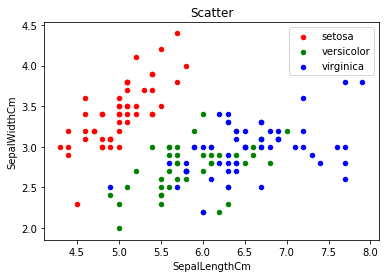

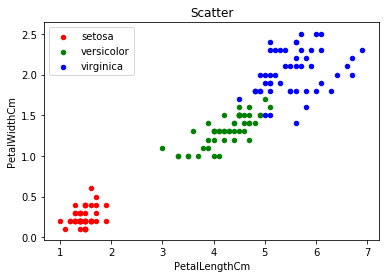

In [15]:
# Scatter plot using pandas

ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)

ax.set_title("Scatter")

ax = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='virginica', ax=ax)

ax.set_title("Scatter")

## Step 3: Data Preprocessing 

In [18]:
# Features

X = data.drop(['Id','Species'],axis=1)

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
# Labels

Y = data['Species'].map({'Iris-setosa':0 , 'Iris-versicolor':1, 'Iris-virginica':2 })

Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [20]:
X.shape, Y.shape

((150, 4), (150,))

## Step 4: Model Training
Splitting the data into training and testing sets, and training the model.

In [21]:
# Define the model for the algorithm

kmodel = KNeighborsClassifier(n_neighbors=3)

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=6)


xtest.shape

(30, 4)

In [23]:
kmodel.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Step 5: Calculate the Training, Testing and Validation score 

In [25]:
# Calculating training accuracy

Yptr = kmodel.predict(xtrain)

(Yptr == ytrain).mean()

0.975

In [26]:
# Calculating testing accuracy on unknown values for model

Ypts = kmodel.predict(xtest)

(Ypts == ytest).mean()

0.9333333333333333

In [27]:
# Validation score

kmodel.score(xtest,ytest)

0.9333333333333333

In [28]:
Ypred = kmodel.predict(X)

Ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [29]:
# Confusion matrix

confusion_matrix(Ypred,Y)

array([[50,  0,  0],
       [ 0, 47,  2],
       [ 0,  3, 48]], dtype=int64)

In a confusion matrix, the predicted class labels (0, 1, 2) are written along the top (column names). The true class labels (Iris-setosa, etc.) are written along the right side. Each cell in the matrix is a count of how many instances of a true class where classified as each of the predicted classes.

## Step 6: Visualizing the Model cluster 

Text(0.5, 1.0, "Model's Classification")

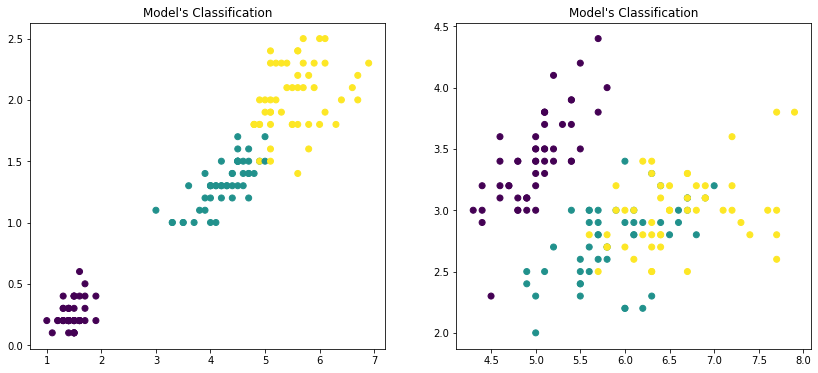

In [30]:
# Visualizing the scatters

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X['PetalLengthCm'] ,X['PetalWidthCm'],c = Ypred)
plt.title('Model\'s Classification')

plt.subplot(1, 2, 2)
plt.scatter(X['SepalLengthCm'] ,X['SepalWidthCm'],c = Ypred)
plt.title('Model\'s Classification')

## Conclusion: 

### I was able to successfully carry-out prediction using Unsupervised Machine Learning using the Iris given dataset and was able to evaluate the model's clustering accuracy score. 

Thank You!